In [485]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [486]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

In [487]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS-Todos.xlsx'
df_rrss0 = pd.read_excel(archivo)
df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_RURAL_INEI']-df_rrss0["POB_URBANA_INEI"] > 0, 'Si', 'No')
df_rrss0.head()

,IDDIST,NOMBDEP,NOMBPROV,NOMBDIST,NOM_CAPITAL (LEGAL),COD_ REG_NAT,REGION NATURAL,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_URBANA_INEI,...,CLASIFICACION_MUNICIPAL_MEF,GENERACION_MUN_TANIO,RRSS_INDUSTRIAL,QUEMA_RRSS,RRSS_SALUD,MicE,PE,ME,GE,Rural es mayor Urba
0,10104,AMAZONAS,CHACHAPOYAS,CHETO,CHETO,2,SIERRA,SIERRA,DISTRITAL,452,...,F,103.70,0,0,0,1.0,NaN,NaN,NaN,No
1,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,CHILIQUIN,2,SIERRA,SIERRA,DISTRITAL,156,...,G,35.79,0,0,0,1.0,NaN,NaN,NaN,Si
2,10106,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,CHUQUIBAMBA,2,SIERRA,SIERRA,DISTRITAL,464,...,G,106.45,0,0,0,1.0,NaN,NaN,NaN,Si
3,10516,AMAZONAS,LUYA,SAN CRISTOBAL,OLTO,2,SIERRA,SIERRA,DISTRITAL,422,...,E,63.95,0,0,0,1.0,NaN,NaN,NaN,No
4,10518,AMAZONAS,LUYA,SAN JERONIMO,PACLAS,2,SIERRA,SIERRA,DISTRITAL,192,...,G,44.05,0,0,0,1.0,NaN,NaN,NaN,Si


In [488]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)
for idx, col in enumerate (df_rrss0):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:QUEMA_RRSS
15,Nombre de la columna:RRSS_SALUD
16,Nombre de la columna:MicE
17,Nombre de la columna:PE
18,Nombre de la columna:ME
19,Nombre de la columna:GE
20,Nombre de la columna:Rural es mayor Urba


In [489]:
df_rrss=df_rrss0[df_rrss0["Rural es mayor Urba"]=="Si"]


df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
df_rrss.iloc[:,16:20] = df_rrss.iloc[:,16:20].fillna(0)

#Convertirmos lo valores que queremos a tipo float
#df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1 to 1470
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            827 non-null    int64  
 1   NOMBDEP                           827 non-null    object 
 2   NOMBPROV                          827 non-null    object 
 3   NOMBDIST                          827 non-null    object 
 4   NOM_CAPITAL (LEGAL)               827 non-null    object 
 5   COD_ REG_NAT                      827 non-null    int64  
 6   REGION NATURAL                    827 non-null    object 
 7   REGION_NATURAL                    827 non-null    object 
 8   TIPO_MUNICIPALIDAD                827 non-null    object 
 9   POB_URBANA_INEI                   827 non-null    int64  
 10  POB_RURAL_INEI                    827 non-null    int64  
 11  CLASIFICACION_MUNICIPAL_MEF       827 non-null    object 
 12  GENERACION_M

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\274267763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\274267763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\274267763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [490]:
#transformamos a logaritmo todas las columnas para realizar la covarianza
cols_a_log=df_rrss.columns[16:20]
for col in cols_a_log:
    df_rrss[col + '_log'] = np.log(df_rrss[col]+1)

#Vemos en que posicion se encuentran nuestras columnas calculdadas    
for idx, col in enumerate (df_rrss):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:QUEMA_RRSS
15,Nombre de la columna:RRSS_SALUD
16,Nombre de la columna:MicE
17,Nombre de la columna:PE
18,Nombre de la columna:ME
19,Nombre de la columna:GE
20,Nombre de la columna:Rural es mayor Urba
21,Nombre de la columna:Log Poblacion Urbana
22,Nombre de la columna:Log Poblacion Rural
23,Nombre de la columna:Log Residuos solidos municipales
24,Nombre de la columna:MicE_log
25,Nombre de la columna:PE_log
26,Nombre de la columna:ME_lo

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\1695728755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss[col + '_log'] = np.log(df_rrss[col]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\1695728755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss[col + '_log'] = np.log(df_rrss[col]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_5384\1695728755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [491]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [492]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

      IDDIST   NOMBDEP     NOMBPROV      NOMBDIST NOM_CAPITAL (LEGAL)  \
1      10105  AMAZONAS  CHACHAPOYAS     CHILIQUIN           CHILIQUIN   
2      10106  AMAZONAS  CHACHAPOYAS   CHUQUIBAMBA         CHUQUIBAMBA   
4      10518  AMAZONAS         LUYA  SAN JERONIMO              PACLAS   
8      20103    ANCASH       HUARAZ    COLCABAMBA          COLCABAMBA   
9      20111    ANCASH       HUARAZ          PIRA                PIRA   
...      ...       ...          ...           ...                 ...   
1458  210601      PUNO     HUANCANE      HUANCANE            HUANCANE   
1459  210701      PUNO        LAMPA         LAMPA               LAMPA   
1461  211201      PUNO       SANDIA        SANDIA              SANDIA   
1462  211301      PUNO      YUNGUYO       YUNGUYO             YUNGUYO   
1470  250201   UCAYALI      ATALAYA      RAIMONDI             ATALAYA   

      COD_ REG_NAT REGION NATURAL REGION_NATURAL TIPO_MUNICIPALIDAD  \
1                2         SIERRA         SIERRA    

In [493]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count     827.000000    827.000000       827.000000      827.000000   
mean   100362.013301      2.200726      1630.359129     4612.689238   
std     66871.308406      0.720404      2934.133582     6073.726437   
min     10103.000000      1.000000        52.000000      155.000000   
25%     50405.500000      2.000000       361.500000     1263.500000   
50%     90105.000000      2.000000       757.000000     2660.000000   
75%    150452.500000      2.000000      1769.000000     5722.000000   
max    250401.000000      4.000000     43353.000000    82773.000000   

       GENERACION_MUN_TANIO  RRSS_INDUSTRIAL  QUEMA_RRSS  RRSS_SALUD  \
count            827.000000       827.000000  827.000000  827.000000   
mean             397.667509         0.091898    0.276904    0.155985   
std              805.965102         0.289057    0.447740    0.363061   
min               11.930000         0.000000    0.000000    0.000000   


In [494]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                              False
NOMBDEP                             False
NOMBPROV                            False
NOMBDIST                            False
NOM_CAPITAL (LEGAL)                 False
COD_ REG_NAT                        False
REGION NATURAL                      False
REGION_NATURAL                      False
TIPO_MUNICIPALIDAD                  False
POB_URBANA_INEI                     False
POB_RURAL_INEI                      False
CLASIFICACION_MUNICIPAL_MEF         False
GENERACION_MUN_TANIO                False
RRSS_INDUSTRIAL                     False
QUEMA_RRSS                          False
RRSS_SALUD                          False
MicE                                False
PE                                  False
ME                                  False
GE                                  False
Rural es mayor Urba                 False
Log Poblacion Urbana                False
Log Poblacion Rural                 False
Log Residuos solidos municipales  

ANALISIS EXPLORATORIO DE DATOS

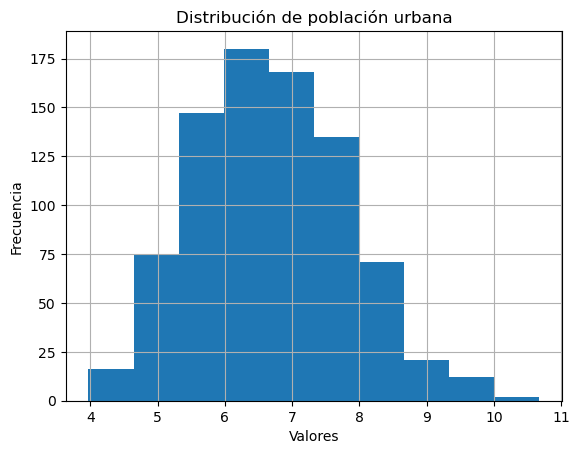

In [495]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


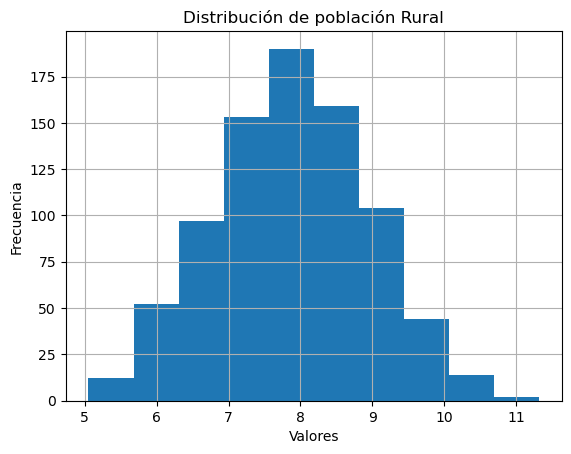

In [496]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


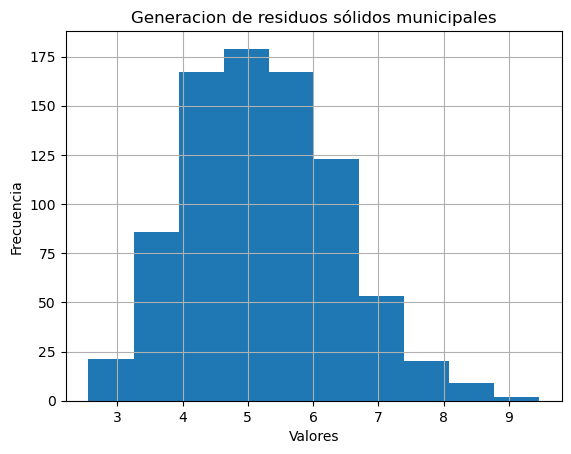

In [497]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

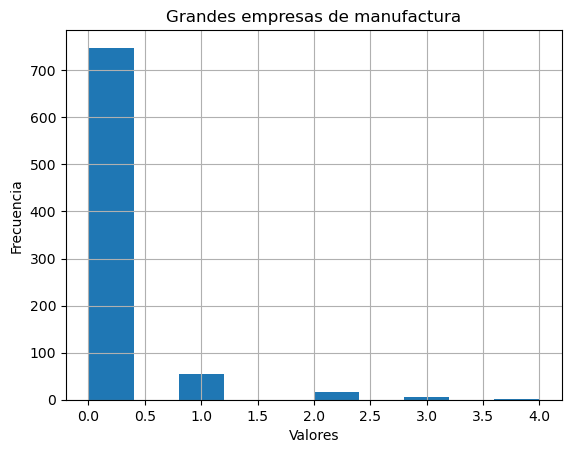

In [498]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["GE"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [499]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()\nplt.title("Mypimes de comercio")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [500]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()\nplt.title("Mypimes de manufactura")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [501]:
columnas_pob_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",
                                    "Log Residuos solidos municipales"                    
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,24:28]
df_var=pd.concat([columnas_pob_residuos,columnas_empresas], axis=1)            
print(df_var.info())


#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var):
    print(f"{idx},Nombre de la columna:{col}")

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1 to 1470
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log Poblacion Urbana              827 non-null    float64
 1   Log Poblacion Rural               827 non-null    float64
 2   Log Residuos solidos municipales  827 non-null    float64
 3   MicE_log                          827 non-null    float64
 4   PE_log                            827 non-null    float64
 5   ME_log                            827 non-null    float64
 6   GE_log                            827 non-null    float64
dtypes: float64(7)
memory usage: 51.7 KB
None
0,Nombre de la columna:Log Poblacion Urbana
1,Nombre de la columna:Log Poblacion Rural
2,Nombre de la columna:Log Residuos solidos municipales
3,Nombre de la columna:MicE_log
4,Nombre de la columna:PE_log
5,Nombre de la columna:ME_log
6,Nombre de la columna:GE_log


In [502]:
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var.columns, columns=df_var.columns)
print(cov_df)

                                  Log Poblacion Urbana  Log Poblacion Rural  \
Log Poblacion Urbana                          1.001211             0.742241   
Log Poblacion Rural                           0.742241             1.001211   
Log Residuos solidos municipales              0.985755             0.737571   
MicE_log                                      0.647989             0.525008   
PE_log                                        0.419072             0.425718   
ME_log                                        0.498070             0.413995   
GE_log                                        0.439099             0.365084   

                                  Log Residuos solidos municipales  MicE_log  \
Log Poblacion Urbana                                      0.985755  0.647989   
Log Poblacion Rural                                       0.737571  0.525008   
Log Residuos solidos municipales                          1.001211  0.644512   
MicE_log                                       

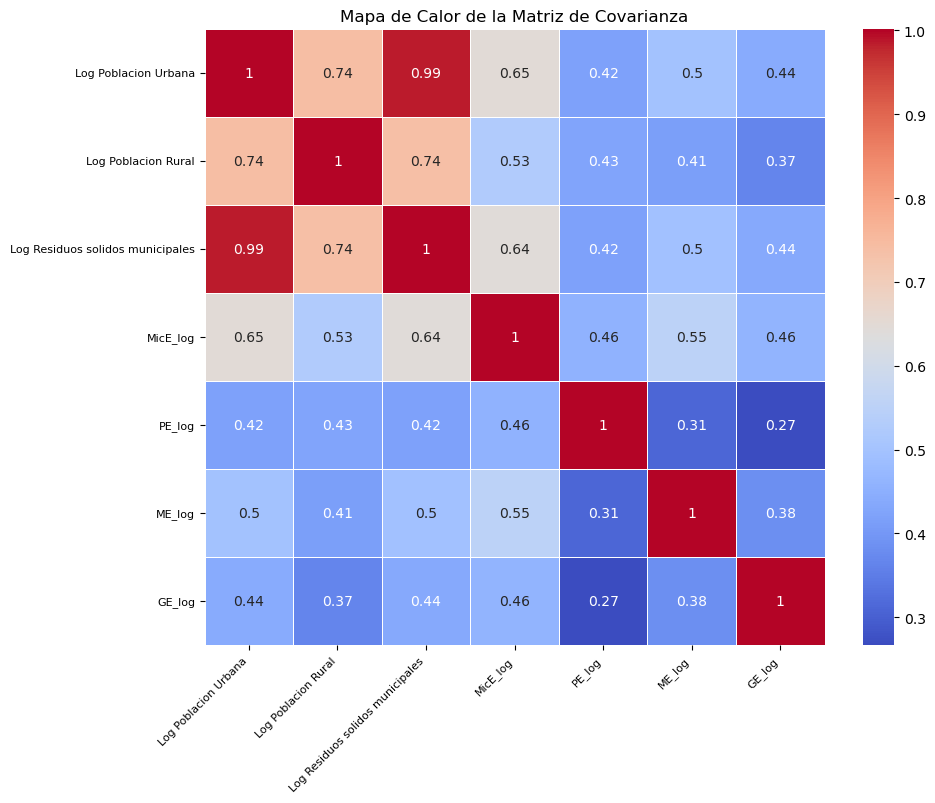

In [503]:


# Crear el mapa de calor
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=cov_df.isnull())

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
# Eliminar etiquetas en blanco
heatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])
heatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])

# Mostrar el mapa de calor
plt.title('Mapa de Calor de la Matriz de Covarianza')
plt.show()



In [504]:

#Todas las variables
X = df_var.iloc[:,list(range(0,2))+list(range(3,7))]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.970
Model:                                          OLS   Adj. R-squared:                  0.969
Method:                               Least Squares   F-statistic:                     4353.
Date:                              Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                                      03:15:53   Log-Likelihood:                 154.85
No. Observations:                               827   AIC:                            -295.7
Df Residuals:                                   820   BIC:                            -262.7
Df Model:                                         6                                         
Covariance Type:                          nonrobust                                         
                           coef    std err          t      P>|t|      

In [505]:
"""#Las variables con p<0.05
X=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",
"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", 
"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Las variables con p<0.05\nX=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",\n"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", \n"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'

Coeficientes: [0.         0.98604079 0.01358557 0.00683162 0.00947888 0.01158786
 0.01529912]
Intercepto: -1.494409039815836
MSE: 0.04026162980603307
R^2: 0.9695601558339845


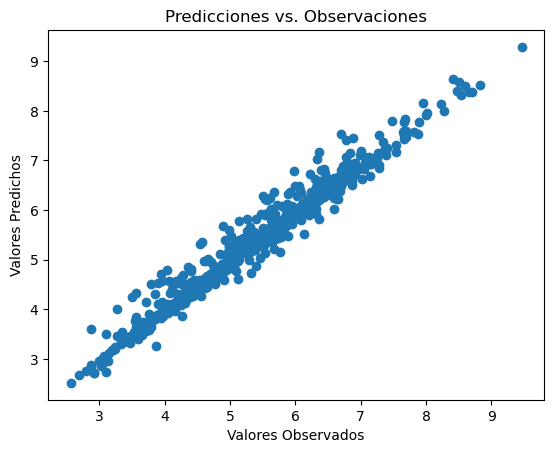

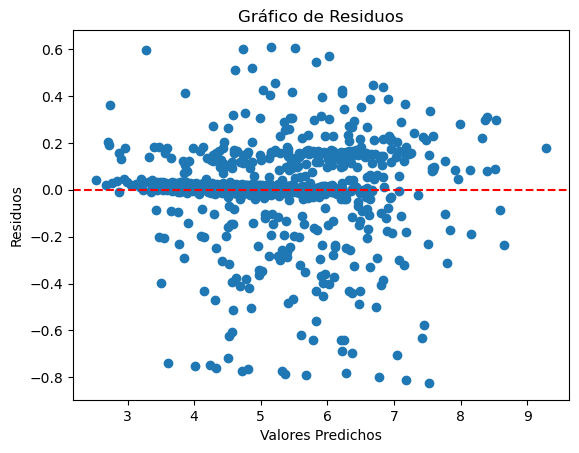

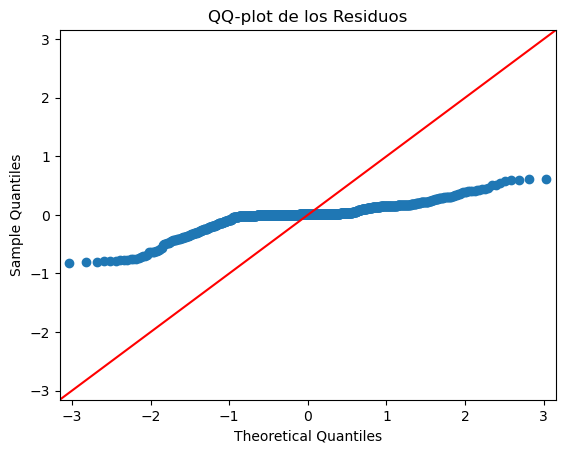

{'LM Statistic': 18.610529440151225, 'LM-Test p-value': 0.0048745386138017675, 'F-Statistic': 3.1463039984005285, 'F-Test p-value': 0.004684003427881978}
Estadístico de Shapiro-Wilk: 0.8263506150115435
p-valor de Shapiro-Wilk: 5.38123546838126e-29


In [506]:
#Verificar la regresion:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from patsy import dmatrices

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))



# Realizar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', shapiro_test[0])
print('p-valor de Shapiro-Wilk:', shapiro_test[1])


BUSQUEMOS UN PCA

In [507]:
columnas_sin_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",                   
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,24:28]
df_var_sin_rrss=pd.concat([columnas_sin_residuos,columnas_empresas], axis=1)            
print(df_var_sin_rrss)

#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var_sin_rrss):
    print(f"{idx},Nombre de la columna:{col}")

      Log Poblacion Urbana  Log Poblacion Rural  MicE_log    PE_log    ME_log  \
1                 5.056246             6.054439  0.693147  0.000000  0.000000   
2                 6.142037             7.285507  0.693147  0.000000  0.000000   
4                 5.262690             6.006353  0.693147  0.000000  0.000000   
8                 4.682131             5.049856  0.693147  0.000000  0.000000   
9                 6.982863             7.781556  0.693147  0.000000  0.000000   
...                    ...                  ...       ...       ...       ...   
1458              8.857800             9.381601  2.944439  0.000000  0.693147   
1459              8.590072             8.759826  2.639057  0.693147  0.693147   
1461              8.286269             8.910181  2.484907  0.000000  0.693147   
1462              9.289798             9.534306  3.258097  0.000000  0.693147   
1470              9.810934            10.019892  5.141664  1.609438  0.000000   

        GE_log  
1     0.00

In [508]:
#Estandarizamos para nuestro PCA
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var_sin_rrss)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var_sin_rrss.columns, columns=df_var_sin_rrss.columns)
print(cov_df)

                      Log Poblacion Urbana  Log Poblacion Rural  MicE_log  \
Log Poblacion Urbana              1.001211             0.742241  0.647989   
Log Poblacion Rural               0.742241             1.001211  0.525008   
MicE_log                          0.647989             0.525008  1.001211   
PE_log                            0.419072             0.425718  0.456618   
ME_log                            0.498070             0.413995  0.552955   
GE_log                            0.439099             0.365084  0.461199   

                        PE_log    ME_log    GE_log  
Log Poblacion Urbana  0.419072  0.498070  0.439099  
Log Poblacion Rural   0.425718  0.413995  0.365084  
MicE_log              0.456618  0.552955  0.461199  
PE_log                1.001211  0.310479  0.266371  
ME_log                0.310479  1.001211  0.381582  
GE_log                0.266371  0.381582  1.001211  


In [509]:
#Creamos nuestro PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'], index=df_rrss_sinNaN.index)
print(pca_df)

           PC1       PC2       PC3
1    -2.244624 -0.762498  0.684763
2    -1.292847 -0.368049 -0.260691
4    -2.177887 -0.757361  0.633550
8    -2.807538 -1.042117  1.274961
9    -0.740923 -0.175812 -0.784505
...        ...       ...       ...
1458  3.884117 -3.091205 -0.333082
1459  3.847632 -2.396691  0.899435
1461  3.264416 -3.226743  0.052464
1462  4.256148 -3.037093 -0.534052
1470  6.069432 -0.967976  1.653823

[827 rows x 3 columns]


[0.55689448 0.12746486 0.10793866]


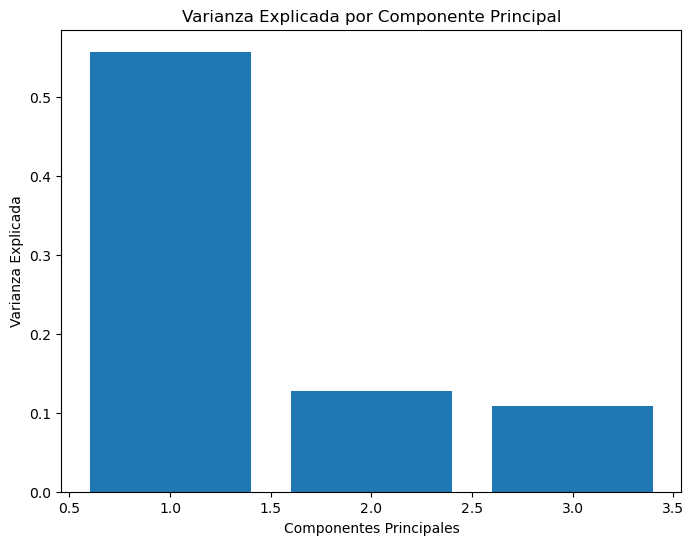

In [510]:
#Creames el gráfico de cargas
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [511]:
componentes_pca=pd.DataFrame(pca.components_,columns=df_var_sin_rrss.columns, index=['PC1', 'PC2','PC3'])
print(componentes_pca)

     Log Poblacion Urbana  Log Poblacion Rural  MicE_log    PE_log    ME_log  \
PC1              0.470466             0.434361  0.452839  0.341556  0.385103   
PC2              0.093015             0.265654 -0.067541  0.641579 -0.343815   
PC3             -0.399058            -0.488827  0.075390  0.659459  0.004208   

       GE_log  
PC1  0.346360  
PC2 -0.621596  
PC3  0.401515  


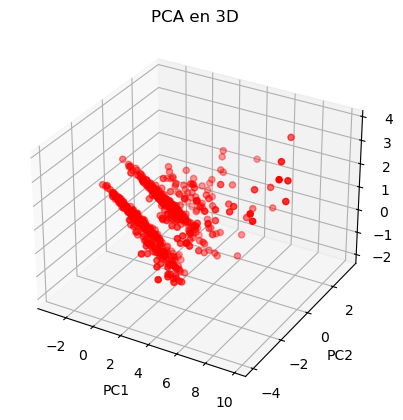

In [512]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title("PCA en 3D")

plt.show()


In [513]:
df_rrss_sinNaN_PCA= pd.concat([df_rrss_sinNaN, pca_df], axis=1)
print(df_rrss_sinNaN_PCA.info())

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1 to 1470
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            827 non-null    int64  
 1   NOMBDEP                           827 non-null    object 
 2   NOMBPROV                          827 non-null    object 
 3   NOMBDIST                          827 non-null    object 
 4   NOM_CAPITAL (LEGAL)               827 non-null    object 
 5   COD_ REG_NAT                      827 non-null    int64  
 6   REGION NATURAL                    827 non-null    object 
 7   REGION_NATURAL                    827 non-null    object 
 8   TIPO_MUNICIPALIDAD                827 non-null    object 
 9   POB_URBANA_INEI                   827 non-null    int64  
 10  POB_RURAL_INEI                    827 non-null    int64  
 11  CLASIFICACION_MUNICIPAL_MEF       827 non-null    object 
 12  GENERACION_M

In [514]:
#Regresion para con el PCA:
#Todas las variables
X_pca = df_rrss_sinNaN_PCA.iloc[:,list(range(29,32))]
y1 = df_rrss_sinNaN_PCA["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X_pca = sm.add_constant(X_pca)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y1, X_pca).fit()

# Resumen del modelo
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.832
Model:                                          OLS   Adj. R-squared:                  0.831
Method:                               Least Squares   F-statistic:                     1356.
Date:                              Fri, 30 Aug 2024   Prob (F-statistic):          6.21e-318
Time:                                      03:15:54   Log-Likelihood:                -552.10
No. Observations:                               827   AIC:                             1112.
Df Residuals:                                   823   BIC:                             1131.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

Coeficientes: [ 0.          0.53692564  0.10607332 -0.44500189]
Intercepto: 5.235682428629799
MSE: 0.2225288982816291
R^2: 0.8317568111683129


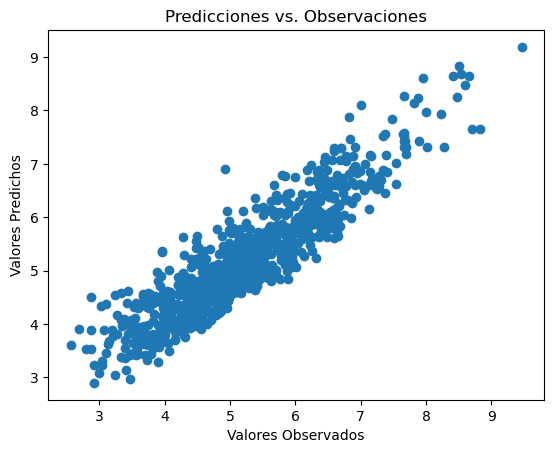

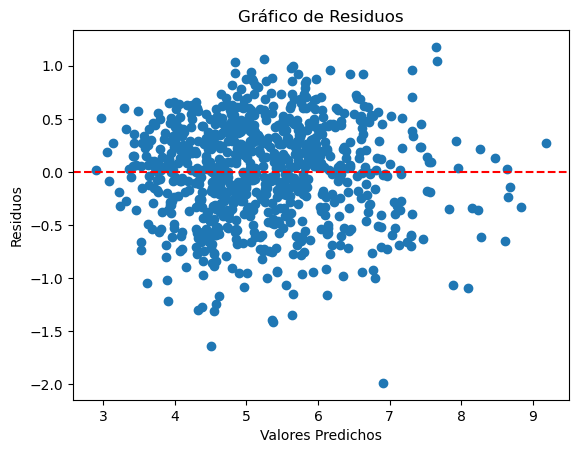

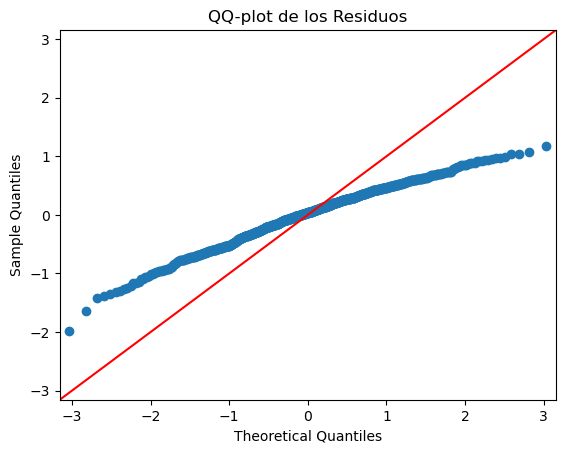

In [515]:
#regresión y supuestos:

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_pca, y1)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X_pca)

# Evaluar el modelo
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y1, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y1 - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

In [516]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from patsy import dmatrices

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_pca)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))



# Realizar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', shapiro_test[0])
print('p-valor de Shapiro-Wilk:', shapiro_test[1])



{'LM Statistic': 11.95676252768862, 'LM-Test p-value': 0.007532750991178522, 'F-Statistic': 4.024496332573211, 'F-Test p-value': 0.007406987945080203}
Estadístico de Shapiro-Wilk: 0.9873981688801048
p-valor de Shapiro-Wilk: 1.5175942731255836e-06


EVALUAR VECINO MÁS CERCANO

MSE: 0.22349577784110675
R^2: 0.8264202820122598
Importancia de PC1: 1.2029173131364759
Importancia de PC2: 0.23352667894719228
Importancia de PC3: 0.41438672147537925


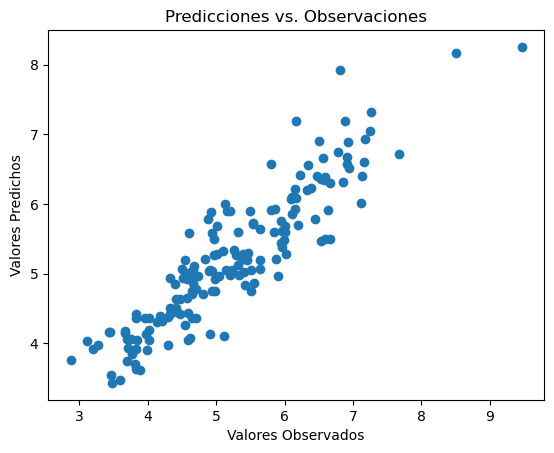

In [527]:

#Evaluar con regresion de vecino más cercano
#Dividimos los datos en conjunto de entrenamiento y prueba
X_vmc = df_rrss_sinNaN_PCA.iloc[:,list(range(29,32))]
y_vmc = df_rrss_sinNaN_PCA["Log Residuos solidos municipales"]

X_train, X_test, y_train, y_test = train_test_split(X_vmc, y_vmc, test_size=0.2, random_state=42)

#Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo k-NN con k=3 (puedes ajustar este valor)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

#Hacemos predicciones y evaluamos el modelo:
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Evaluar la importancia de las características mediante permutación
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Mostrar la importancia de las características
for i, col in enumerate(X_vmc.columns):
    print(f'Importancia de {col}: {importance[i]}')
# Gráfico de Predicciones vs. Observaciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

#Con este análisis se tiene los siguientes componentes principales:

#P1=ACTIVIDAD EMPRESARIAL
#P2=CONTRASTE DE N° de GE y PE
#P3=RELACION INVERSA ENTRE EMPRESAS Y POBLACION

ARBOLES DE DECISION

Importancia de PC1: 0.8411825954250631
Importancia de PC2: 0.05783496884226351
Importancia de PC3: 0.10098243573267328
MSE en conjunto de prueba: 0.23975851072969517
R^2 en conjunto de prueba: 0.8086535143531828


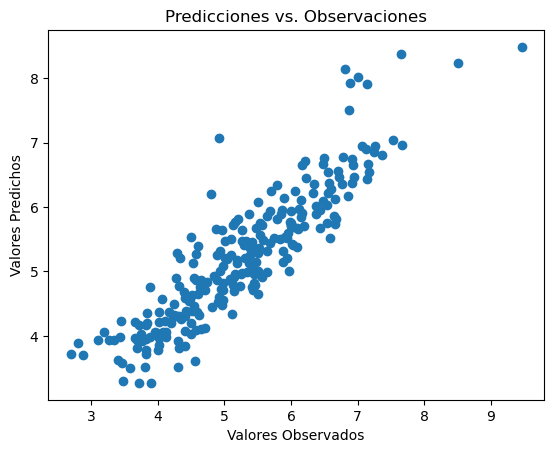

In [518]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vmc, y_vmc, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar el modelo de Bosques Aleatorios
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluar la importancia de las características
importances = rf.feature_importances_
for i, col in enumerate(X_vmc.columns):
    print(f'Importancia de {col}: {importances[i]}')

# Hacer predicciones y evaluar el modelo
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

REALIZAMOS CLUSTERIZACIÓN

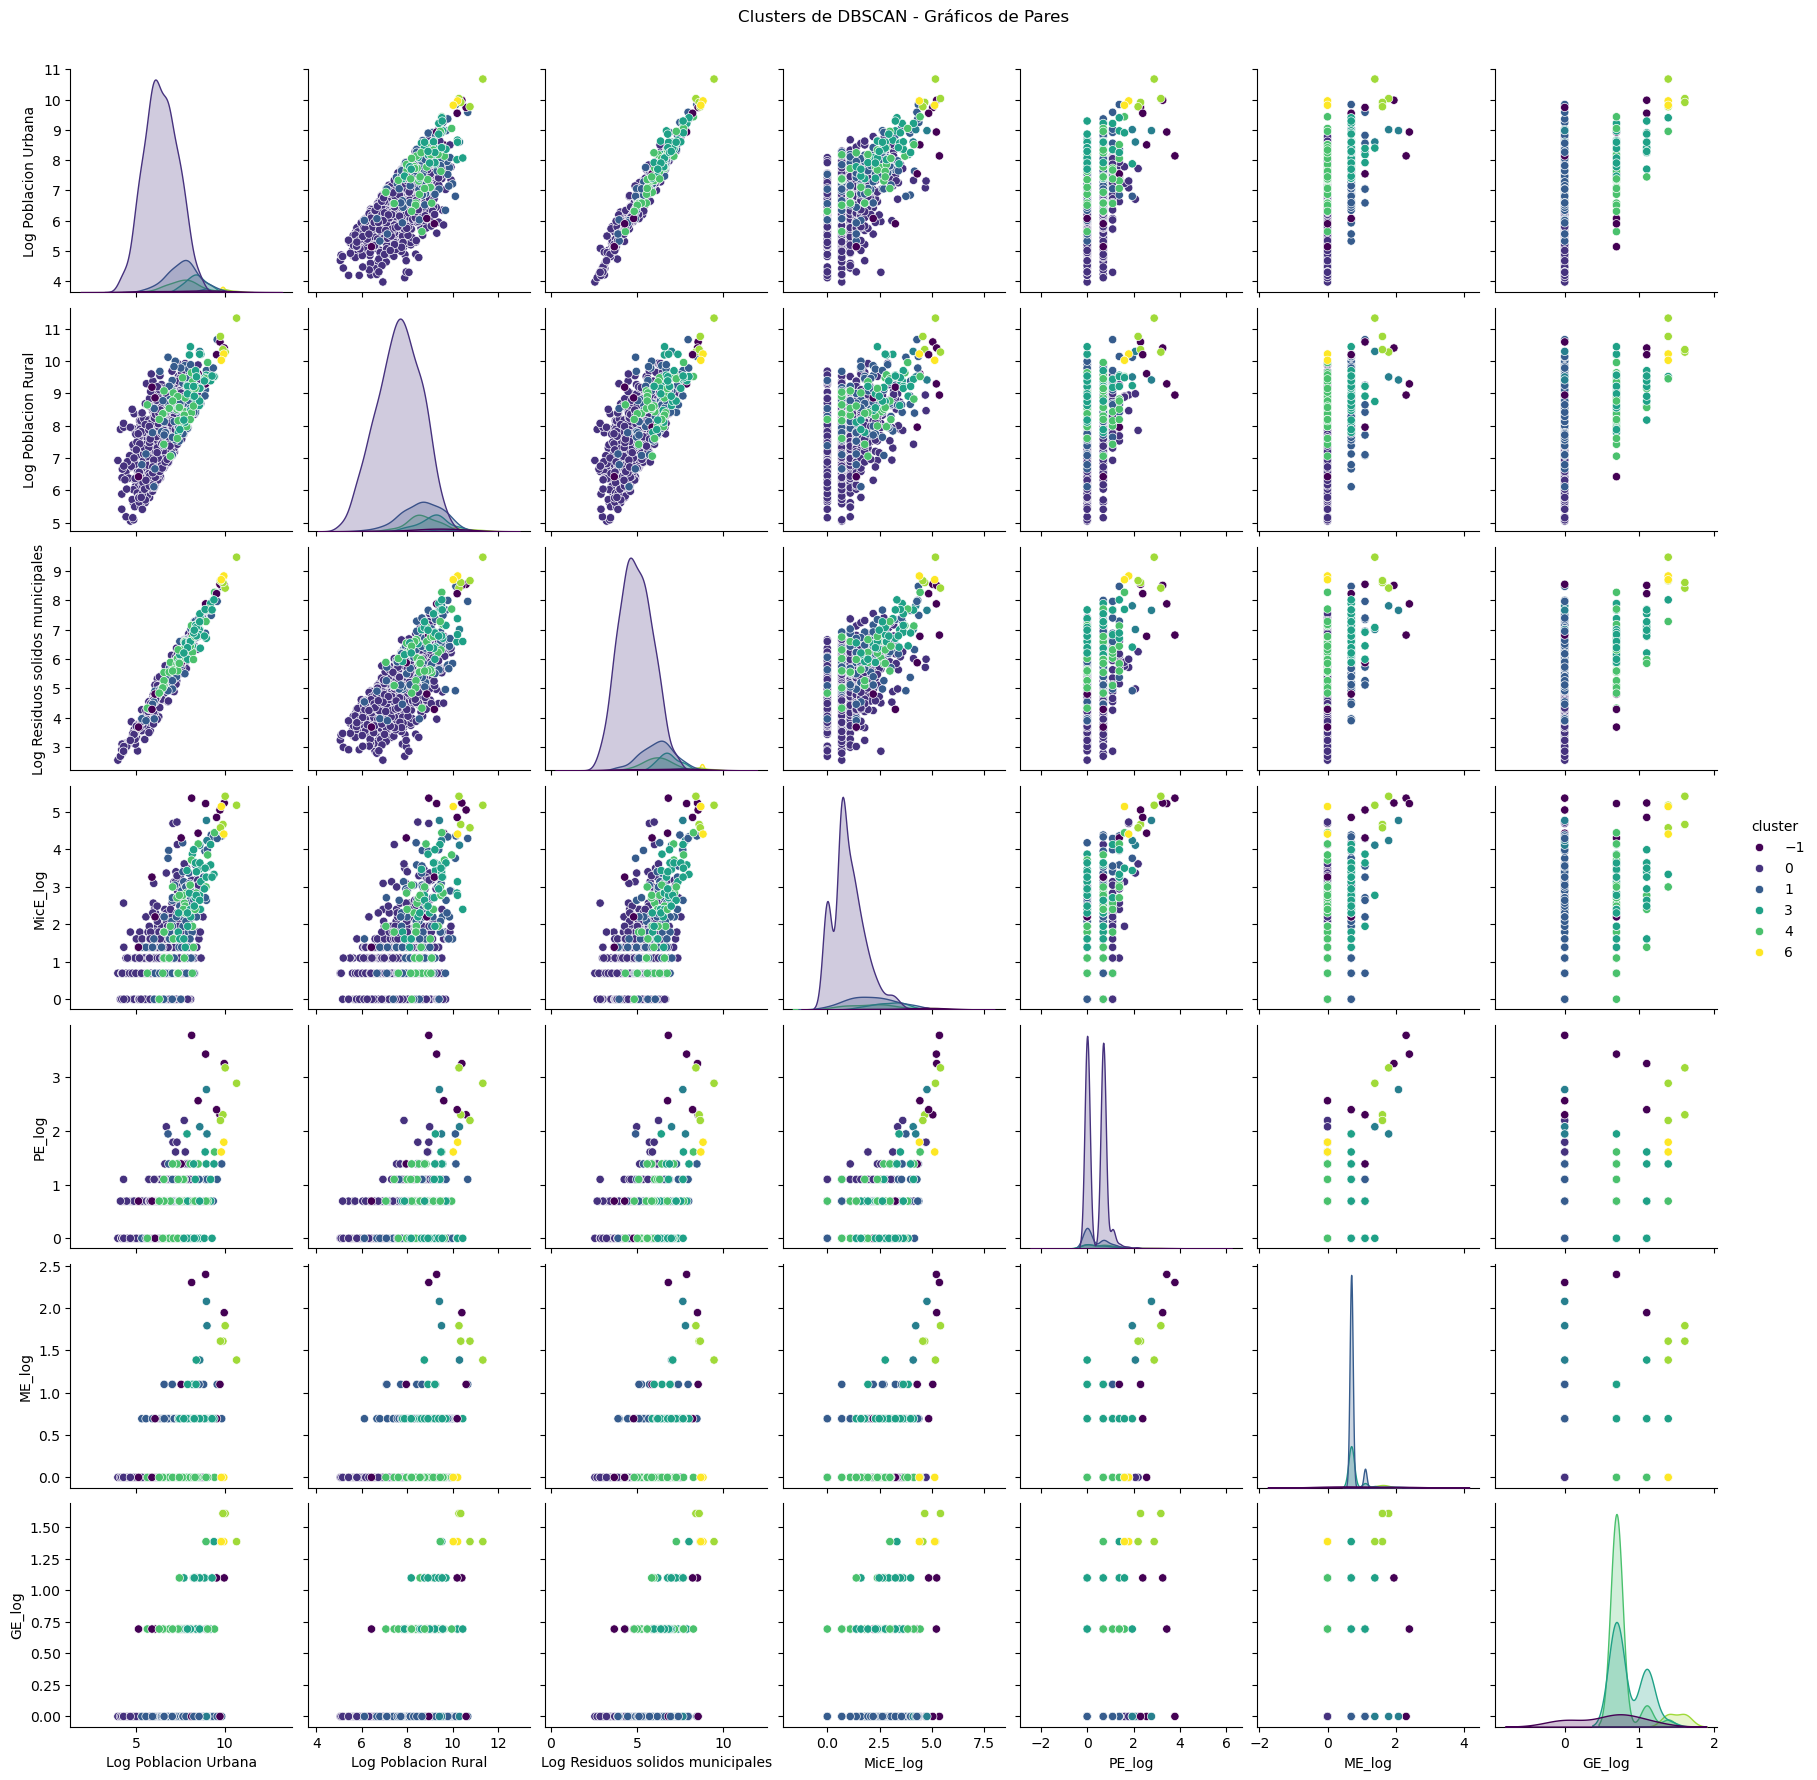

Silhouette Score: 0.3543468009874189
Davies-Bouldin Index: 1.4141458776666036
Número de Outliers: 10


In [519]:
#Regresion para con el PCA:
#Todas las variables
#Todas las variables
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score


scaler = StandardScaler()

X_DBSCAN = df_var.iloc[:,list(range(0,7))]
X_scaled = scaler.fit_transform(X_DBSCAN)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

# Añadir los clusters al DataFrame
X_DBSCAN['cluster'] = clusters

# Visualizar los clusters
#plt.scatter(X['poblacion'], X['residuos_solidos'], c=X['cluster'], cmap='viridis')
sns.pairplot(X_DBSCAN, hue='cluster', palette='viridis')
plt.suptitle('Clusters de DBSCAN - Gráficos de Pares', y=1.02)
plt.show()


#Evaluar el modelo
sil_score = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)
n_outliers = list(clusters).count(-1)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)
print("Número de Outliers:", n_outliers)
